<a href="https://colab.research.google.com/github/AbhishekA87/ML_Files/blob/main/Uber_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UBER Ride Analytics and Demand Forecast

In [7]:
#Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('/content/drive/MyDrive/ML/Portfolio/Uber Dataset/My Uber Drives - 2016.csv')

In [10]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
df.shape

(1156, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [13]:
df.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [14]:
#Since there are some null values, this needs to be addressed
df.isnull().sum()

,0
START_DATE*,0
END_DATE*,1
CATEGORY*,1
START*,1
STOP*,1
MILES*,0
PURPOSE*,503


In [15]:
df['PURPOSE*'].fillna('NOT', inplace = True)
df.head()

/tmp/ipython-input-4072631857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE*'].fillna('NOT', inplace = True)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [16]:
#Reformat the Start and End date
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], errors = 'coerce')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], errors ='coerce')

In [17]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#Feature Engineering


In [18]:
#Calculate Trip Duration
df['Duration'] = (df['END_DATE*'] - df['START_DATE*']).dt.total_seconds()/60
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [19]:
#Encoding the time based features
df['Start_Hour'] = df['START_DATE*'].dt.hour
df['Start_Day'] = df['START_DATE*'].dt.day

In [20]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Duration,Start_Hour,Start_Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,21.0,1.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,12.0,1.0,2.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,20.0,2.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,17.0,5.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,14.0,6.0


#Encoding the Categorical Values

In [21]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['CATEGORY*', 'START*','STOP*','PURPOSE*']
for col in label_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Duration,Start_Hour,Start_Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,52,49,5.1,6,6.0,21.0,1.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,52,49,5.0,9,12.0,1.0,2.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,52,49,4.8,5,13.0,20.0,2.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,52,49,4.7,7,14.0,17.0,5.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,52,181,63.7,4,67.0,14.0,6.0


In [23]:
#Remove * from every header
df.columns = df.columns.str.replace('*', '')

#Visualizing the entire dataset to find the below;
1. Category booked most by people
2. Purpose people look to book the rides
3. Time of most bookings
4. Months where lesser bookings are made
5. Highest booking on a specific day
6. Distance travelled on average per booking.

/tmp/ipython-input-3136755116.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, y='PURPOSE', data=df,
/tmp/ipython-input-3136755116.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 1], x='MONTH', data=df, palette='Set2')


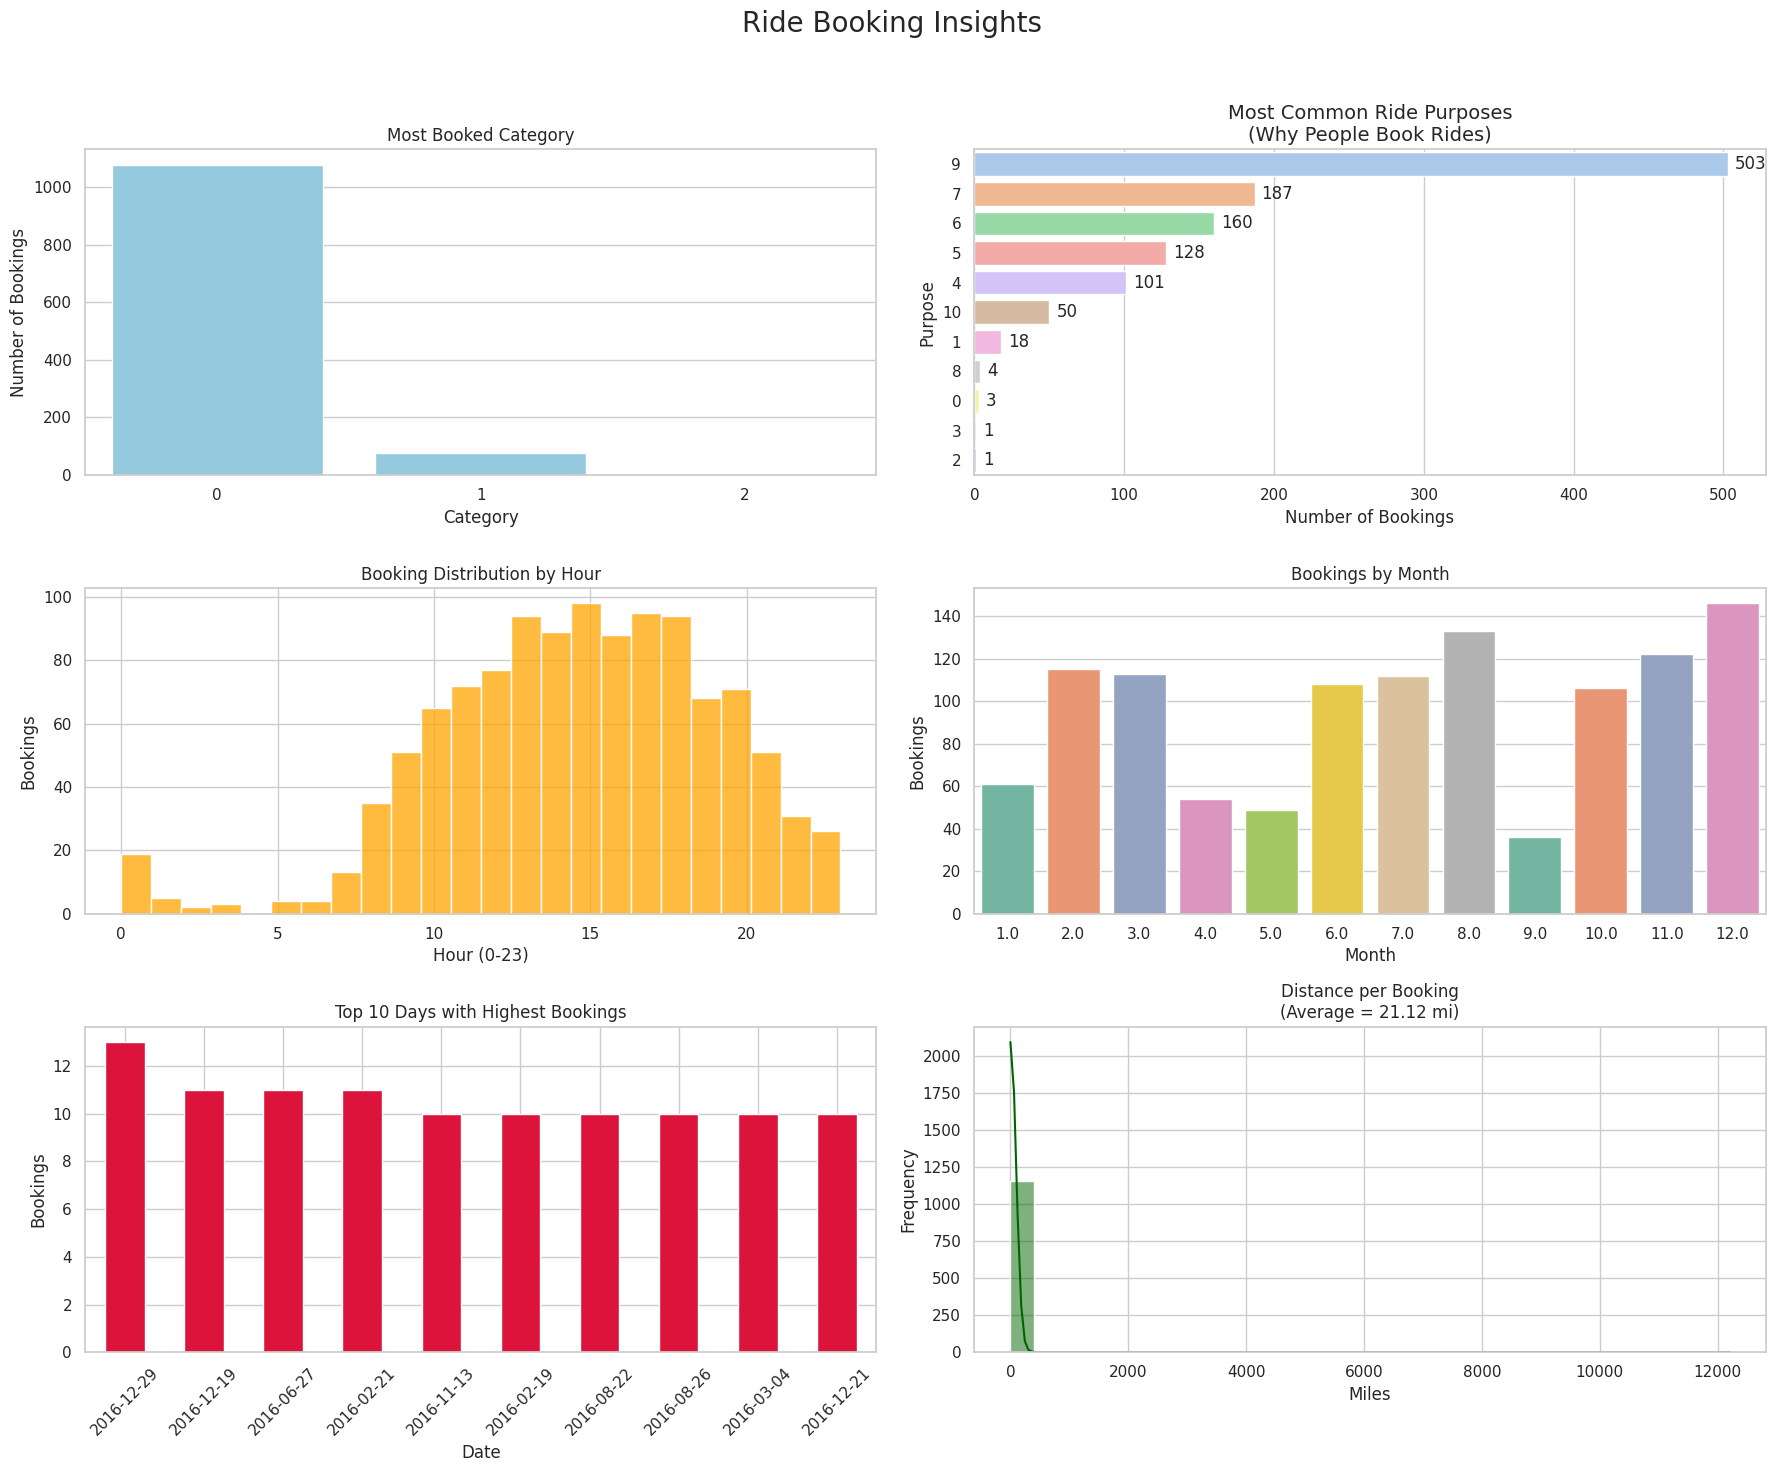

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parse dates if not done
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

# Feature engineering
df['HOUR'] = df['START_DATE'].dt.hour
df['MONTH'] = df['START_DATE'].dt.month
df['DATE_ONLY'] = df['START_DATE'].dt.date

# ✅ Step 1: Map PURPOSE to more descriptive names
purpose_mapping = {
    "Meal/Entertain": "Client Entertainment",
    "Errand/Supplies": "Errand or Supply Run",
    "Meeting": "Business Meeting",
    "Customer Visit": "Client Visit",
    "Temporary Site": "Temporary Work Site",
    "Commute": "Commute to/from Work",
    "Airport/Travel": "Travel/Airport Trip",
    "Moving": "Moving Items or Equipment",
    "Between Offices": "Inter-office Travel",
    # Add any others as needed
}

df['PURPOSE'] = df['PURPOSE'].replace(purpose_mapping)

# Plot settings
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Ride Booking Insights', fontsize=20)

# 1. Most Booked Category (Color: Sky Blue)
sns.countplot(ax=axes[0, 0], x='CATEGORY', data=df, color='skyblue')
axes[0, 0].set_title('Most Booked Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Number of Bookings')

# 2. Purpose of Rides (Palette: Pastel + Annotated + Descriptive Title)
ax = axes[0, 1]
sns.countplot(ax=ax, y='PURPOSE', data=df,
              order=df['PURPOSE'].value_counts().index,
              palette='pastel')
ax.set_title('Most Common Ride Purposes\n(Why People Book Rides)', fontsize=14)
ax.set_xlabel('Number of Bookings')
ax.set_ylabel('Purpose')

# Add labels to purpose bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=5)

# 3. Booking Time by Hour (Color: Orange)
sns.histplot(ax=axes[1, 0], data=df, x='HOUR', bins=24, kde=False, color='orange')
axes[1, 0].set_title('Booking Distribution by Hour')
axes[1, 0].set_xlabel('Hour (0-23)')
axes[1, 0].set_ylabel('Bookings')

# 4. Monthly Booking Trend (Palette: Set2)
sns.countplot(ax=axes[1, 1], x='MONTH', data=df, palette='Set2')
axes[1, 1].set_title('Bookings by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Bookings')

# 5. Highest Booking Days (Color: Crimson)
top_days = df['DATE_ONLY'].value_counts().head(10)
top_days.plot(kind='bar', ax=axes[2, 0], color='crimson')
axes[2, 0].set_title('Top 10 Days with Highest Bookings')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Bookings')
axes[2, 0].tick_params(axis='x', rotation=45)

# 6. Distance per Booking (Color: Dark Green)
sns.histplot(ax=axes[2, 1], data=df, x='MILES', bins=30, kde=True, color='darkgreen')
axes[2, 1].set_title(f'Distance per Booking\n(Average = {df["MILES"].mean():.2f} mi)')
axes[2, 1].set_xlabel('Miles')
axes[2, 1].set_ylabel('Frequency')

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/tmp/ipython-input-3665346434.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TIME_OF_DAY', data=df, order=order, palette='Set3')


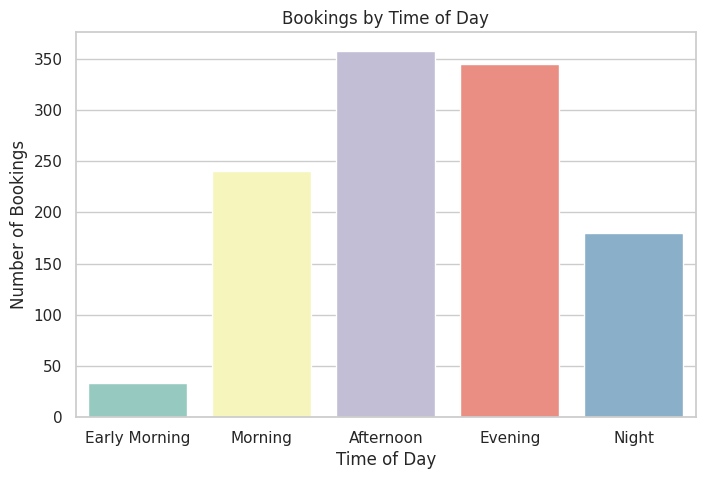

/tmp/ipython-input-3665346434.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='TIME_OF_DAY', data=df, order=order, palette='Set3')


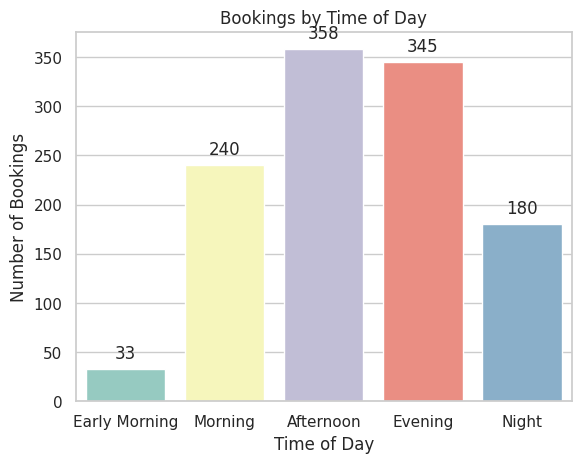

In [25]:
# Time of the day when bookings are made
def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Make sure 'HOUR' exists
df['HOUR'] = df['START_DATE'].dt.hour

# Apply function
df['TIME_OF_DAY'] = df['HOUR'].apply(get_time_of_day)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
sns.countplot(x='TIME_OF_DAY', data=df, order=order, palette='Set3')
plt.title('Bookings by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Bookings')
plt.show()

ax = sns.countplot(x='TIME_OF_DAY', data=df, order=order, palette='Set3')
plt.title('Bookings by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Bookings')

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5)

plt.show()


/tmp/ipython-input-1152507424.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='MONTH_NAME', order=month_order, palette='coolwarm')
/tmp/ipython-input-1152507424.py:32: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


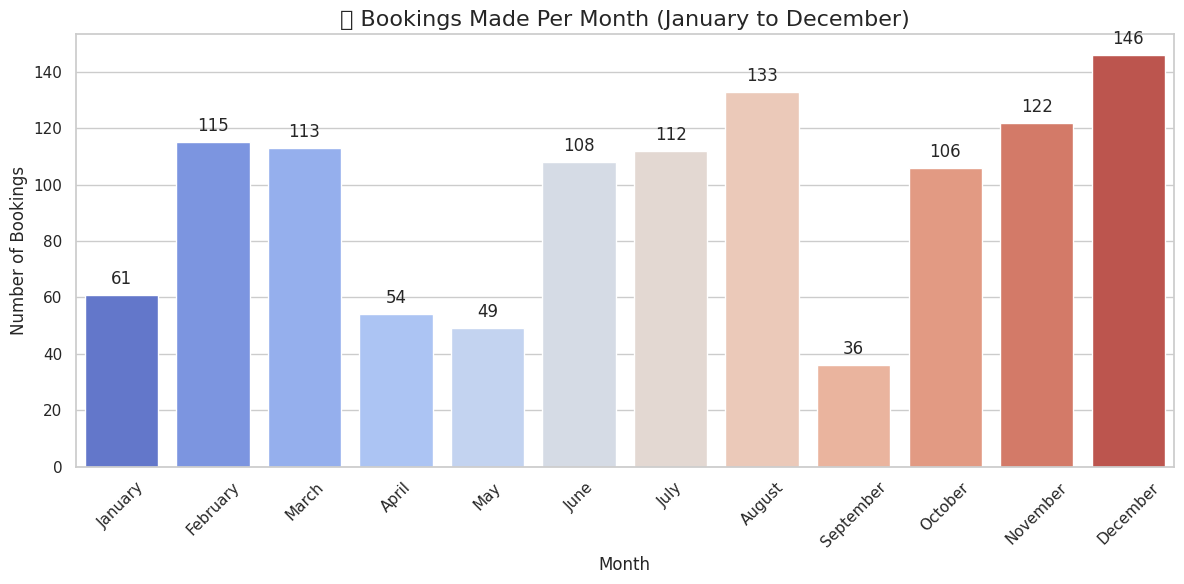

In [26]:
#Months in which bookings were made

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure START_DATE is datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# Extract Month (1-12) and Month Name
df['MONTH_NUM'] = df['START_DATE'].dt.month
df['MONTH_NAME'] = df['START_DATE'].dt.strftime('%B')

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MONTH_NAME', order=month_order, palette='coolwarm')

plt.title('📅 Bookings Made Per Month (January to December)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

# Annotate bar labels
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5)

plt.tight_layout()
plt.show()


In [27]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Duration,Start_Hour,Start_Day,HOUR,MONTH,DATE_ONLY,TIME_OF_DAY,MONTH_NUM,MONTH_NAME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,52,49,5.1,6,6.0,21.0,1.0,21.0,1.0,2016-01-01,Night,1.0,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,52,49,5.0,9,12.0,1.0,2.0,1.0,1.0,2016-01-02,Early Morning,1.0,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,52,49,4.8,5,13.0,20.0,2.0,20.0,1.0,2016-01-02,Night,1.0,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,52,49,4.7,7,14.0,17.0,5.0,17.0,1.0,2016-01-05,Evening,1.0,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,52,181,63.7,4,67.0,14.0,6.0,14.0,1.0,2016-01-06,Afternoon,1.0,January


In [28]:
#Use the numeric data for week days
df['WEEKDAY'] = df['START_DATE'].dt.weekday

#Define the dictionary to map numeric days to their labels
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

#Map to day
df['WEEKDAY'] = df['WEEKDAY'].map(day_mapping)

#Display the dataset
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Duration,Start_Hour,Start_Day,HOUR,MONTH,DATE_ONLY,TIME_OF_DAY,MONTH_NUM,MONTH_NAME,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,52,49,5.1,6,6.0,21.0,1.0,21.0,1.0,2016-01-01,Night,1.0,January,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,52,49,5.0,9,12.0,1.0,2.0,1.0,1.0,2016-01-02,Early Morning,1.0,January,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,52,49,4.8,5,13.0,20.0,2.0,20.0,1.0,2016-01-02,Night,1.0,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,52,49,4.7,7,14.0,17.0,5.0,17.0,1.0,2016-01-05,Evening,1.0,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,52,181,63.7,4,67.0,14.0,6.0,14.0,1.0,2016-01-06,Afternoon,1.0,January,Wednesday


/tmp/ipython-input-814956836.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='WEEKDAY', order=day_order, palette='mako')
/tmp/ipython-input-814956836.py:25: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


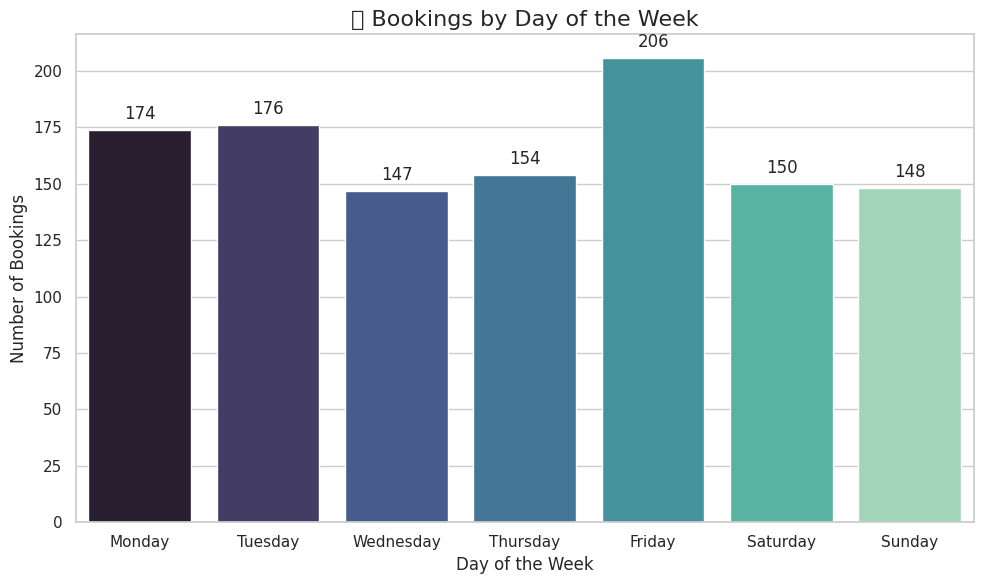

In [29]:
#Visualize the daywise bookings
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Define day order for x-axis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='WEEKDAY', order=day_order, palette='mako')

# Title and labels
plt.title('📆 Bookings by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')

# Add number labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5)

# Show the plot
plt.tight_layout()
plt.show()


# Models: We will create 4 models that will help us to understand the below;
1. Classification: To predict category (whether its business or personal). using the Logistic Regression, Random Forest and XGBoost
2. Predict Miles: Using the Linear Regression Model and Radnsom Forest Regressor model
3. Predict the number of bookings during the day; Time Series modeling using ARIMA, Prophet and LSTM
4. Unsupervised Models:  Clustering model to segment bookings by behavior using k-means


#Classification: Logistic Regression, Random Forest and XGBoost

In [30]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Duration,Start_Hour,Start_Day,HOUR,MONTH,DATE_ONLY,TIME_OF_DAY,MONTH_NUM,MONTH_NAME,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,52,49,5.1,6,6.0,21.0,1.0,21.0,1.0,2016-01-01,Night,1.0,January,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,52,49,5.0,9,12.0,1.0,2.0,1.0,1.0,2016-01-02,Early Morning,1.0,January,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,52,49,4.8,5,13.0,20.0,2.0,20.0,1.0,2016-01-02,Night,1.0,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,52,49,4.7,7,14.0,17.0,5.0,17.0,1.0,2016-01-05,Evening,1.0,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,52,181,63.7,4,67.0,14.0,6.0,14.0,1.0,2016-01-06,Afternoon,1.0,January,Wednesday


In [31]:
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Copy clean dataset
df_model = df.copy()

# Label encode categorical columns
label_cols = ['TIME_OF_DAY', 'MONTH_NAME', 'WEEKDAY', 'PURPOSE']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le


In [32]:
df_model.info()
df_model.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE   1155 non-null   datetime64[ns]
 1   END_DATE     1155 non-null   datetime64[ns]
 2   CATEGORY     1156 non-null   int64         
 3   START        1156 non-null   int64         
 4   STOP         1156 non-null   int64         
 5   MILES        1156 non-null   float64       
 6   PURPOSE      1156 non-null   int64         
 7   Duration     1155 non-null   float64       
 8   Start_Hour   1155 non-null   float64       
 9   Start_Day    1155 non-null   float64       
 10  HOUR         1155 non-null   float64       
 11  MONTH        1155 non-null   float64       
 12  DATE_ONLY    1155 non-null   object        
 13  TIME_OF_DAY  1156 non-null   int64         
 14  MONTH_NUM    1155 non-null   float64       
 15  MONTH_NAME   1156 non-null   int64         
 16  WEEKDA

,0
START_DATE,1
END_DATE,1
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0
Duration,1
Start_Hour,1
Start_Day,1


In [33]:
#Remove Null values
df_model.dropna(inplace = True)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features and target
X = df_model[['MILES', 'HOUR', 'MONTH', 'TIME_OF_DAY', 'PURPOSE', 'WEEKDAY']]
y = df_model['CATEGORY']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = clf.predict(X_test)
print(" Classification Report:\n", classification_report(y_test, y_pred_lr))




 Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       216
           1       0.00      0.00      0.00        15

    accuracy                           0.94       231
   macro avg       0.47      0.50      0.48       231
weighted avg       0.87      0.94      0.90       231



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
#Calculate the ROC AUC Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_lr)

np.float64(0.5)

In [36]:
#Validate the test score
clf.score(X_test, y_test)

0.935064935064935

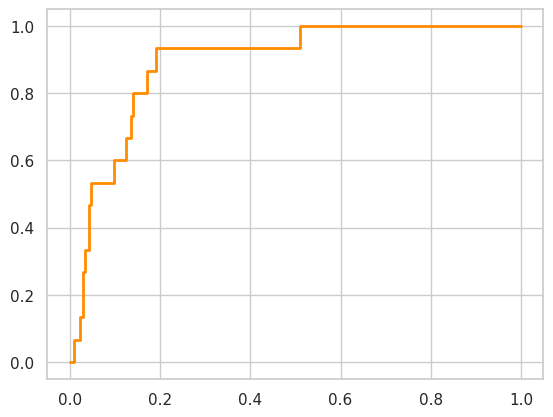

In [37]:
#Visualise the Score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.show()

In [38]:
#Logistic Regression Model using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features and target
X = df_model[['MILES', 'HOUR', 'MONTH', 'TIME_OF_DAY', 'PURPOSE', 'WEEKDAY']]
y = df_model['CATEGORY']  # Target: 0 = Business, 1 = Personal

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluate
y_pred_rf = rfc.predict(X_test)
print(" Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       216
           1       0.60      0.40      0.48        15

    accuracy                           0.94       231
   macro avg       0.78      0.69      0.73       231
weighted avg       0.94      0.94      0.94       231



In [39]:
#Evaluate the Model Score
rfc.score(X_test, y_test)

0.9437229437229437

In [40]:
#XGBoost Model for prediction
from xgboost import XGBClassifier as xbc
from sklearn.metrics import mean_squared_error, r2_score

# Train XGBoost Regressor
xgb_reg = xbc()
xgb_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_reg.predict(X_test)
print(f"⚡ XGB RMSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"⚡ XGB R² Score: {r2_score(y_test, y_pred_xgb):.2f}")

⚡ XGB RMSE: 0.06
⚡ XGB R² Score: -0.07


In [41]:
#Validate the Score
xgb_reg.score(X_test, y_test)

0.935064935064935

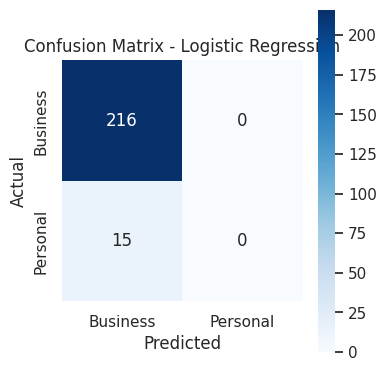

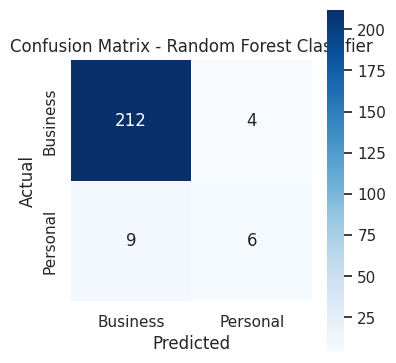

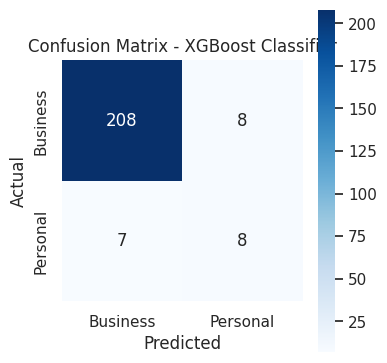

/tmp/ipython-input-1884924524.py:49: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


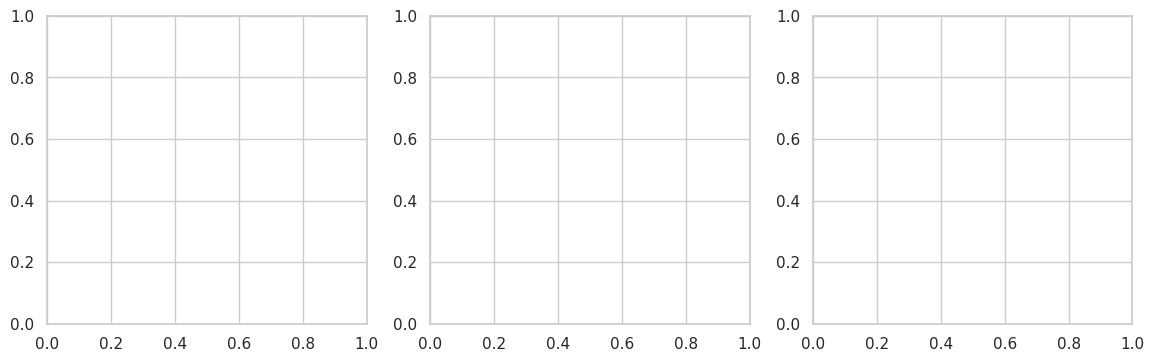

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


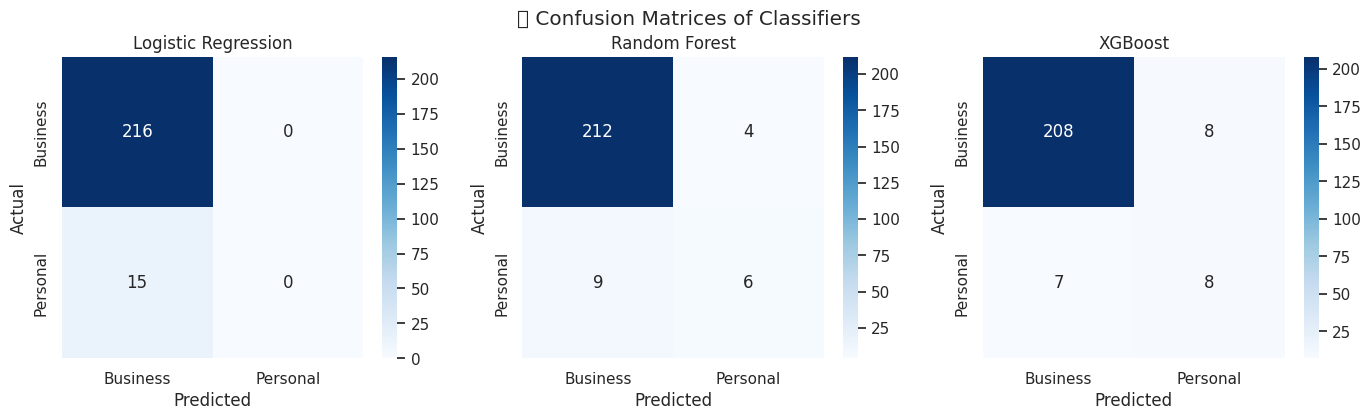

In [42]:
#Create a confusion matrix for the three models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
                xticklabels=['Business', 'Personal'],
                yticklabels=['Business', 'Personal'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Logistic Regression
plot_conf_matrix(y_test, y_pred_lr, 'Logistic Regression')

# Random Forest Classifier
plot_conf_matrix(y_test, y_pred_rf, 'Random Forest Classifier')

# XGBoost Classifier
plot_conf_matrix(y_test, y_pred_xgb, 'XGBoost Classifier')


#Visualizing the three
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

for ax, (name, preds) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, ax=ax,
                xticklabels=['Business', 'Personal'],
                yticklabels=['Business', 'Personal'])
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.suptitle('🔍 Confusion Matrices of Classifiers')
plt.tight_layout()
plt.show()




#Conclusion: Comparing and evaluating the three models


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Store all model results
model_results = []

# Logistic Regression
model_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1 Score': f1_score(y_test, y_pred_lr)
})

# Random Forest
model_results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
})

# XGBoost
model_results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb)
})

# Convert to DataFrame
results_df = pd.DataFrame(model_results)
results_df.set_index('Model', inplace=True)
results_df


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.935065,0.0,0.000000,0.000000
Random Forest,0.943723,0.6,0.400000,0.480000
XGBoost,0.935065,0.5,0.533333,0.516129


/tmp/ipython-input-2318613928.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


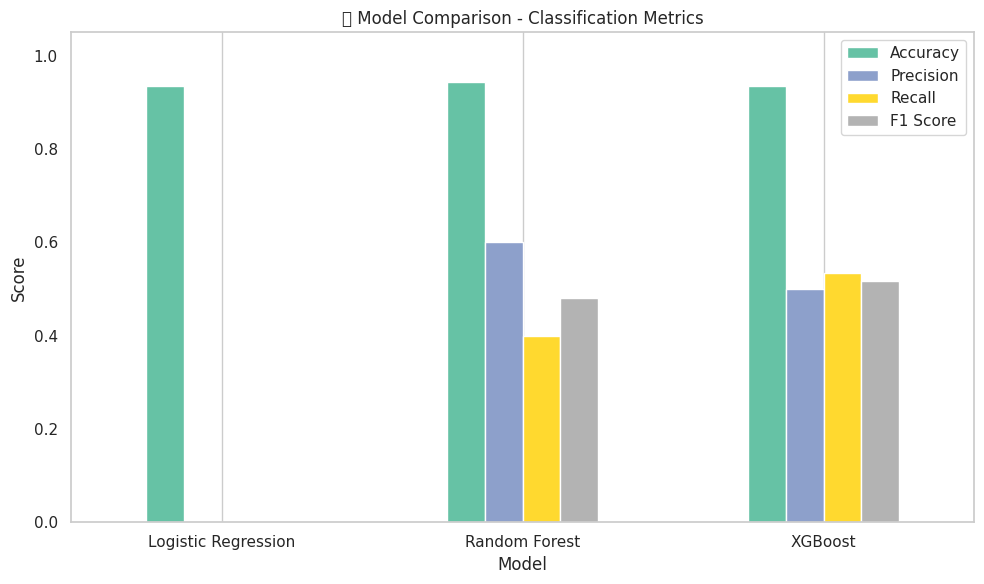

In [44]:
# Visualizing the scores
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("📊 Model Comparison - Classification Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [45]:
#Getting the Best Score using the Average Scores
# Add average score
results_df['Average Score'] = results_df.mean(axis=1)

# Find the best model
best_model = results_df['Average Score'].idxmax()
best_score = results_df['Average Score'].max()

print(f" Best Model: {best_model} (Avg Score: {best_score:.4f})")


 Best Model: XGBoost (Avg Score: 0.6211)


# Conclusion: XGBoost has the best average score as the recall value is higher in XGboost as compared to LR, which has a better accuracy.

#Model 2: Predict Miles: Using the Linear Regression Model and Random Forest Regressor model


In [46]:
df_model.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Duration,Start_Hour,Start_Day,HOUR,MONTH,DATE_ONLY,TIME_OF_DAY,MONTH_NUM,MONTH_NAME,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,52,49,5.1,6,6.0,21.0,1.0,21.0,1.0,2016-01-01,4,1.0,4,0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,52,49,5.0,9,12.0,1.0,2.0,1.0,1.0,2016-01-02,1,1.0,4,2
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,52,49,4.8,5,13.0,20.0,2.0,20.0,1.0,2016-01-02,4,1.0,4,2
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,52,49,4.7,7,14.0,17.0,5.0,17.0,1.0,2016-01-05,2,1.0,4,5
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,52,181,63.7,4,67.0,14.0,6.0,14.0,1.0,2016-01-06,0,1.0,4,6


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop unneeded columns
cols_to_drop = ['index', 'START_DATE', 'END_DATE', 'DATE_ONLY']
df_classify = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Prepare features and target
target = 'MILES'
X = df.drop(columns=[target])
y = df[target]



In [48]:
#Prepare the two models
# Drop non-numeric columns before splitting for regression models
X = df_model.drop(columns=[target, 'START_DATE', 'END_DATE', 'DATE_ONLY'])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'Linear Regression RMSE: {rmse_lr:.3f}')
print(f'Random Forest RMSE: {rmse_rf:.3f}')

Linear Regression RMSE: 15.424
Random Forest RMSE: 14.156


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_pred_lr from Linear Regression
# y_pred_rf from Random Forest
# and true targets: y_test

# Function to print evaluation metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  MAE:  {mae:.3f}")
    print(f"  R²:   {r2:.3f}")
    print("-" * 30)

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression Evaluation:
  RMSE: 15.424
  MAE:  6.741
  R²:   0.591
------------------------------
Random Forest Evaluation:
  RMSE: 14.156
  MAE:  5.347
  R²:   0.655
------------------------------


In [50]:
#Validate the results for both the models
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define RMSE scorer (because sklearn only has MSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for Linear Regression
lr = LinearRegression()
lr_scores = cross_val_score(lr, X, y, scoring=rmse_scorer, cv=kf)
print(f"Linear Regression CV RMSE (mean ± std): {-lr_scores.mean():.3f} ± {lr_scores.std():.3f}")

# Cross-validation for Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf_scores = cross_val_score(rf, X, y, scoring=rmse_scorer, cv=kf)
print(f"Random Forest CV RMSE (mean ± std): {-rf_scores.mean():.3f} ± {rf_scores.std():.3f}")


Linear Regression CV RMSE (mean ± std): 11.312 ± 3.046
Random Forest CV RMSE (mean ± std): 10.664 ± 3.897


##Visualizing the concluding the results


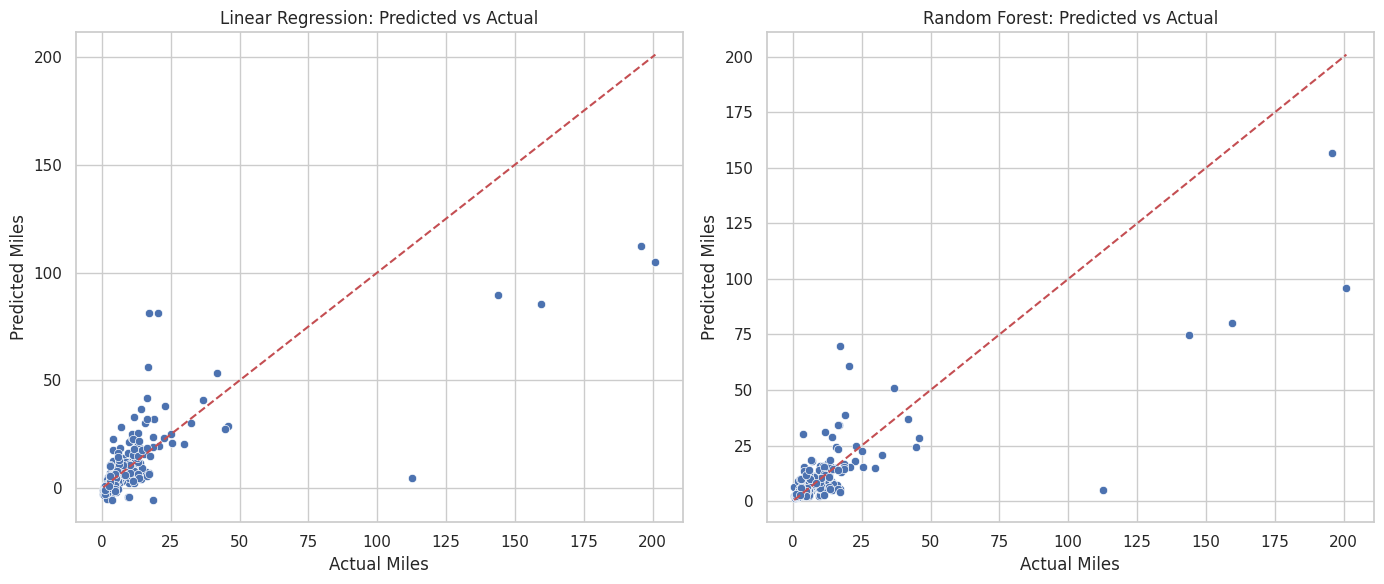

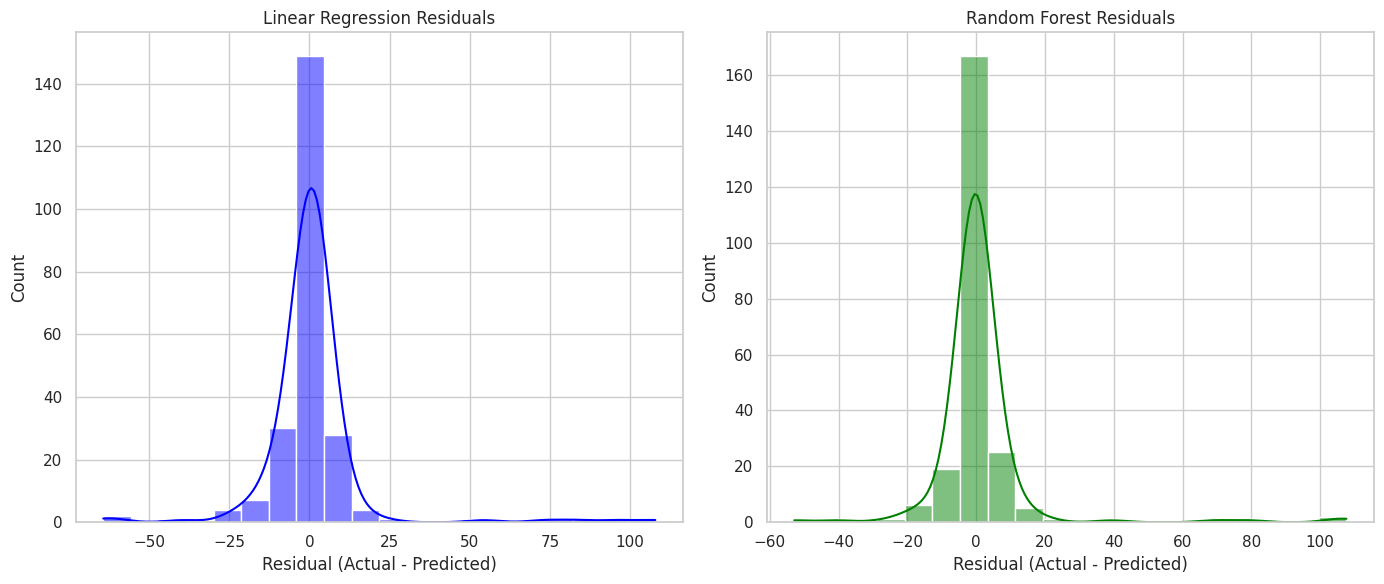

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have these from before:
# y_test, y_pred_lr, y_pred_rf

plt.figure(figsize=(14,6))

# 1. Predicted vs Actual: Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Miles')
plt.ylabel('Predicted Miles')
plt.title('Linear Regression: Predicted vs Actual')
plt.grid(True)

# 2. Predicted vs Actual: Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Miles')
plt.ylabel('Predicted Miles')
plt.title('Random Forest: Predicted vs Actual')
plt.grid(True)

plt.tight_layout()
plt.show()

# Residual plots (prediction errors)
plt.figure(figsize=(14,6))

# Residuals for Linear Regression
plt.subplot(1, 2, 1)
residuals_lr = y_test - y_pred_lr
sns.histplot(residuals_lr, kde=True, bins=20, color='blue')
plt.title('Linear Regression Residuals')
plt.xlabel('Residual (Actual - Predicted)')

# Residuals for Random Forest
plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_rf
sns.histplot(residuals_rf, kde=True, bins=20, color='green')
plt.title('Random Forest Residuals')
plt.xlabel('Residual (Actual - Predicted)')

plt.tight_layout()
plt.show()


In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  MAE:  {mae:.3f}")
    print(f"  R²:   {r2:.3f}")
    print("-" * 30)
    return rmse, mae, r2

# Evaluate both models
rmse_lr, mae_lr, r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
rmse_rf, mae_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Simple decision logic based on RMSE
if rmse_rf < rmse_lr:
    print("Random Forest is the better model based on RMSE.")
elif rmse_rf > rmse_lr:
    print("Linear Regression is the better model based on RMSE.")
else:
    print("Both models perform equally well based on RMSE.")



Linear Regression Evaluation:
  RMSE: 15.424
  MAE:  6.741
  R²:   0.591
------------------------------
Random Forest Evaluation:
  RMSE: 14.156
  MAE:  5.347
  R²:   0.655
------------------------------
Random Forest is the better model based on RMSE.


#MODEL 3: Predict the number of bookings during the day; Time Series modeling using Prophet and LSTM


In [53]:
df_model.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Duration,Start_Hour,Start_Day,HOUR,MONTH,DATE_ONLY,TIME_OF_DAY,MONTH_NUM,MONTH_NAME,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,52,49,5.1,6,6.0,21.0,1.0,21.0,1.0,2016-01-01,4,1.0,4,0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,52,49,5.0,9,12.0,1.0,2.0,1.0,1.0,2016-01-02,1,1.0,4,2
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,52,49,4.8,5,13.0,20.0,2.0,20.0,1.0,2016-01-02,4,1.0,4,2
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,52,49,4.7,7,14.0,17.0,5.0,17.0,1.0,2016-01-05,2,1.0,4,5
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,52,181,63.7,4,67.0,14.0,6.0,14.0,1.0,2016-01-06,0,1.0,4,6


In [54]:

# Ensure START_DATE is datetime
df_model['START_DATE'] = pd.to_datetime(df_model['START_DATE'])

# Create DATE_ONLY column
df_model['DATE_ONLY'] = df_model['START_DATE'].dt.date

# Aggregate bookings per day
daily_bookings = df_model.groupby('DATE_ONLY').size().reset_index(name='bookings')

# Convert DATE_ONLY to datetime
daily_bookings['DATE_ONLY'] = pd.to_datetime(daily_bookings['DATE_ONLY'])

# Set DATE_ONLY as index
daily_bookings.set_index('DATE_ONLY', inplace=True)

# Display sample
print(daily_bookings.head())


            bookings
DATE_ONLY           
2016-01-01         1
2016-01-02         2
2016-01-05         1
2016-01-06         3
2016-01-07         1


In [55]:
#Handling the missing days with 0 bookings

# Create full date range
full_range = pd.date_range(start=daily_bookings.index.min(), end=daily_bookings.index.max())

# Reindex to full date range and fill missing with 0
daily_bookings = daily_bookings.reindex(full_range, fill_value=0)
daily_bookings.index.name = 'DATE_ONLY'



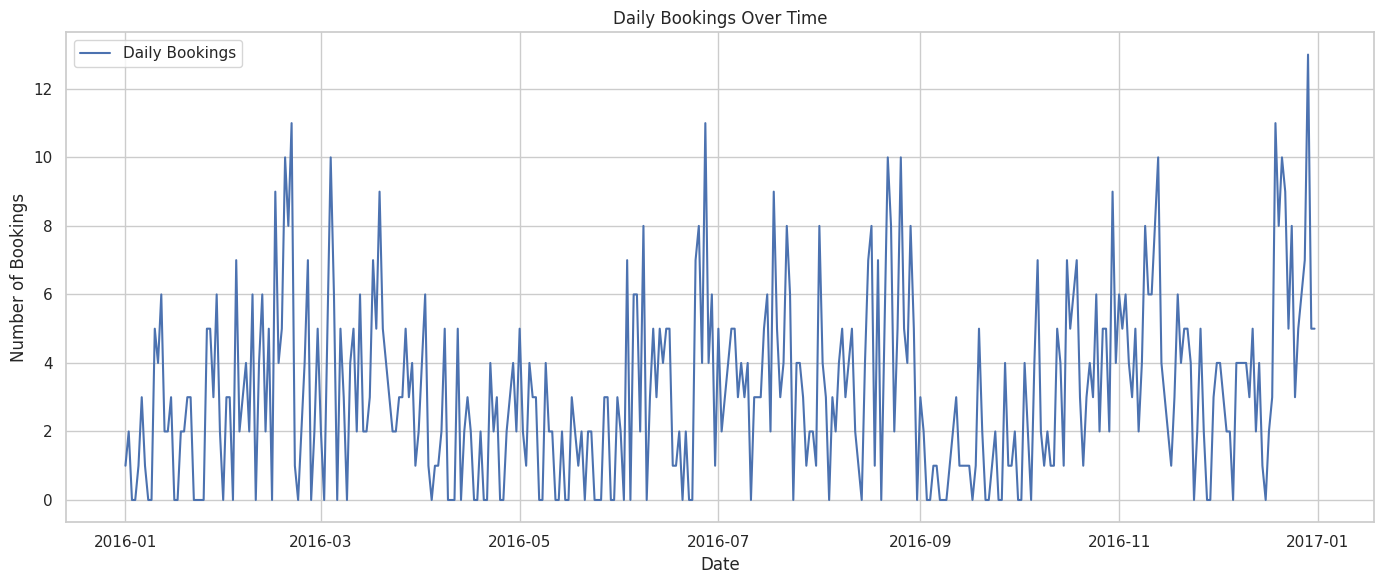

In [56]:
#Create a time Series graph


plt.figure(figsize=(14, 6))
plt.plot(daily_bookings.index, daily_bookings['bookings'], label='Daily Bookings')
plt.title('Daily Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


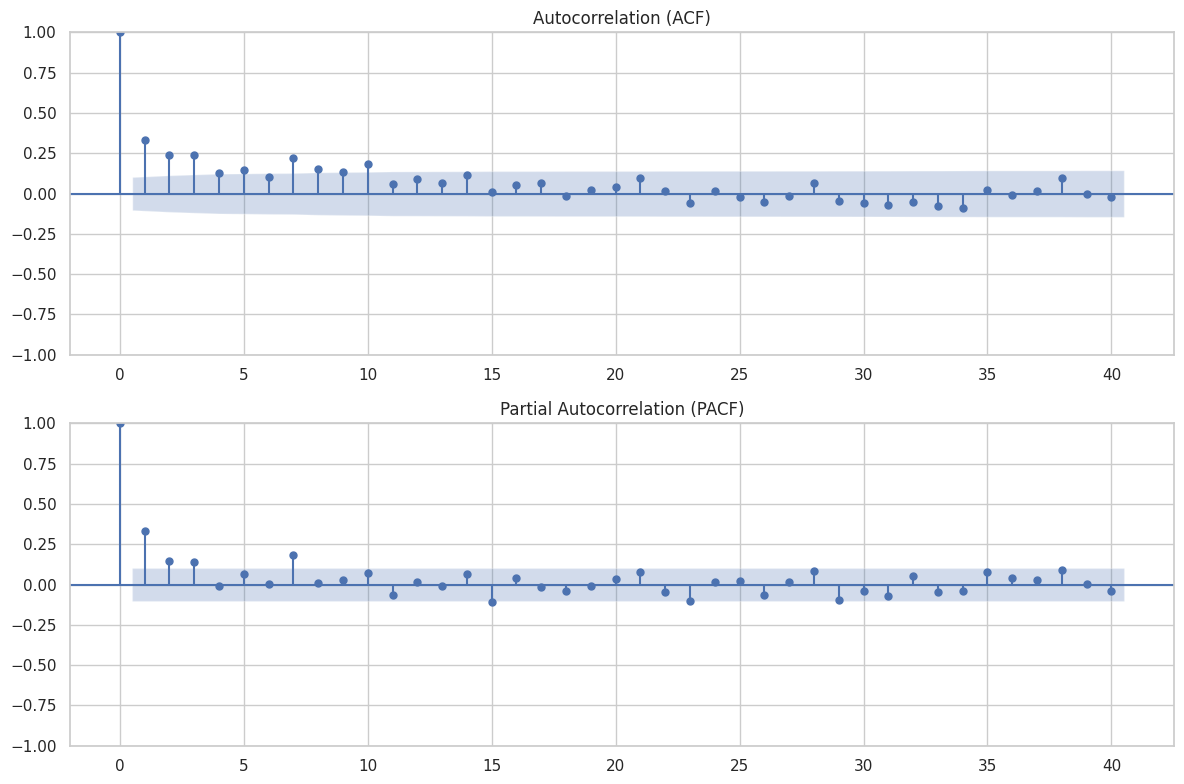

In [57]:
# Checking the Auto-Correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF: Correlation with lagged versions of the series
plot_acf(daily_bookings['bookings'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation (ACF)')

# PACF: Correlation with lagged values after removing earlier lag effects
plot_pacf(daily_bookings['bookings'], lags=40, ax=ax[1], method='ywm')
ax[1].set_title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()





In [58]:
#Evaluate the results of autocorrelation
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(daily_bookings['bookings'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -4.319786366450522
p-value: 0.0004104417863721007
Critical Values:
   1%: -3.4486972813047574
   5%: -2.8696246923288418
   10%: -2.571077032068342


## Modelling


In [98]:
#Use Prophet and SARIMA
!pip install prophet
!pip install statsmodels


In [99]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare Daily Bookings Time Series
df_model['DATE_ONLY'] = pd.to_datetime(df_model['DATE_ONLY'])

# Aggregate bookings per day
daily_bookings = df_model.groupby('DATE_ONLY').size().reset_index(name='bookings')

# Fill in missing dates with 0 bookings
full_range = pd.date_range(start=daily_bookings['DATE_ONLY'].min(), end=daily_bookings['DATE_ONLY'].max())
daily_bookings = daily_bookings.set_index('DATE_ONLY').reindex(full_range, fill_value=0).rename_axis('DATE_ONLY').reset_index()

# Format for Prophet
prophet_df = daily_bookings.rename(columns={'DATE_ONLY': 'ds', 'bookings': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])  # ensure datetime format







In [100]:

# Train-Test Split
train_size = int(len(prophet_df) * 0.8)
train_prophet = prophet_df.iloc[:train_size]
test_prophet = prophet_df.iloc[train_size:]

# Fit Prophet Model
model = Prophet(daily_seasonality=True)
model.fit(train_prophet)

# Create Future Frame and Predict
future = model.make_future_dataframe(periods=len(test_prophet))
forecast = model.predict(future)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4rfl1039/y9xfqxps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4rfl1039/_tibwiy6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28620', 'data', 'file=/tmp/tmp4rfl1039/y9xfqxps.json', 'init=/tmp/tmp4rfl1039/_tibwiy6.json', 'output', 'file=/tmp/tmp4rfl1039/prophet_modeleljhqtct/prophet_model-20250912044201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:42:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:42:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


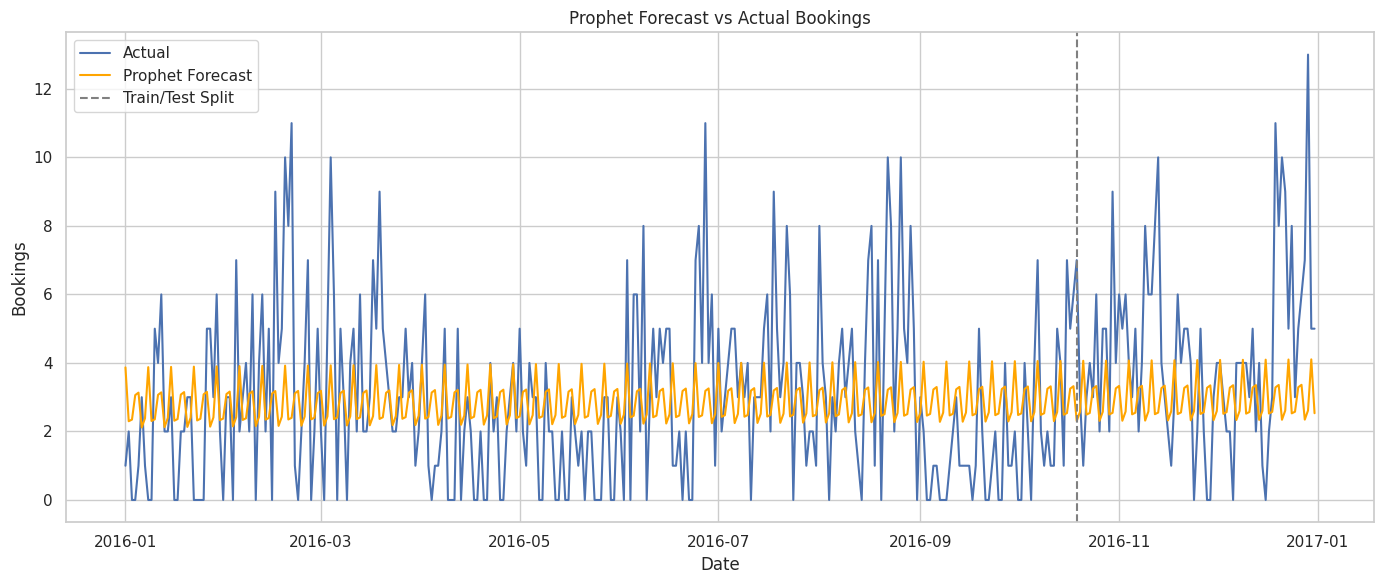

In [101]:
#Visualizing the Model

# Plot Forecast vs Actual
plt.figure(figsize=(14, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast', color='orange')
plt.axvline(x=prophet_df['ds'].iloc[train_size], color='gray', linestyle='--', label='Train/Test Split')
plt.title("Prophet Forecast vs Actual Bookings")
plt.xlabel("Date")
plt.ylabel("Bookings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [102]:

# Evaluation the model
forecast.set_index('ds', inplace=True)
y_pred = forecast.loc[test_prophet['ds'], 'yhat']
y_true = test_prophet.set_index('ds')['y']

mae_prophet = mean_absolute_error(y_true, y_pred)
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"📊 Prophet MAE: {mae_prophet:.2f}")
print(f"📊 Prophet RMSE: {rmse_prophet:.2f}")

prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(train_prophet)

# Make future dataframe
future = prophet_model.make_future_dataframe(periods=len(test_prophet))

# Forecast
forecast = prophet_model.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4rfl1039/3z46bknx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4rfl1039/1zqmze4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40624', 'data', 'file=/tmp/tmp4rfl1039/3z46bknx.json', 'init=/tmp/tmp4rfl1039/1zqmze4b.json', 'output', 'file=/tmp/tmp4rfl1039/prophet_modelzbwqnc8e/prophet_model-20250912044207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:42:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:42:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📊 Prophet MAE: 2.31
📊 Prophet RMSE: 3.15


#SARIMA Model

In [103]:
# Ensure datetime and aggregate daily bookings
df_model['DATE_ONLY'] = pd.to_datetime(df_model['DATE_ONLY'])

# Group by date and reindex to fill missing dates
daily_bookings = df_model.groupby('DATE_ONLY').size().reset_index(name='bookings')
full_range = pd.date_range(start=daily_bookings['DATE_ONLY'].min(), end=daily_bookings['DATE_ONLY'].max())
daily_bookings = daily_bookings.set_index('DATE_ONLY').reindex(full_range, fill_value=0).rename_axis('DATE_ONLY').reset_index()


In [104]:
#Splitting the Data into train, test Sets
# Set index and split
daily_bookings.set_index('DATE_ONLY', inplace=True)

train_size = int(len(daily_bookings) * 0.8)
train_sarima = daily_bookings.iloc[:train_size]
test_sarima = daily_bookings.iloc[train_size:]


In [105]:
#Fitting the SARIMA MOdel
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Example SARIMA parameters (ARIMA + weekly seasonality)
sarima_model = SARIMAX(
    train_sarima,
    order=(1, 1, 1),             # (p, d, q) — ARIMA part
    seasonal_order=(1, 1, 1, 7), # (P, D, Q, s) — seasonality over 7 days
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result = sarima_model.fit(disp=False)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [107]:
#Forecast the Model
forecast_sarima = sarima_result.get_forecast(steps=len(test_sarima))
sarima_pred = forecast_sarima.predicted_mean

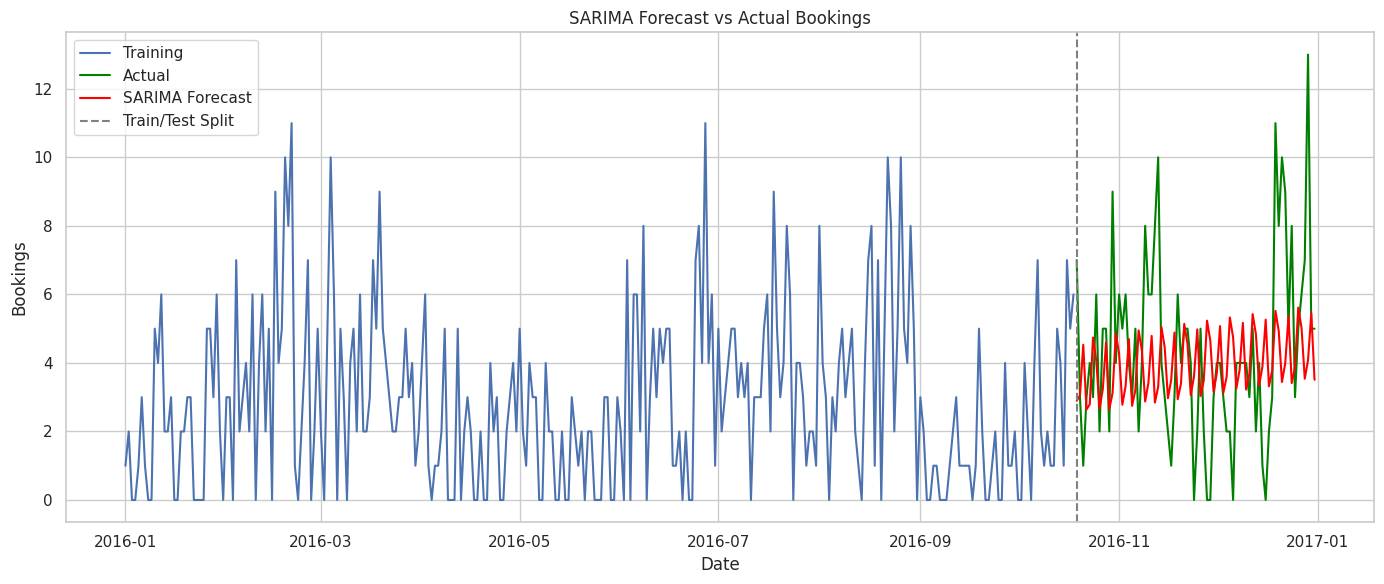

In [108]:
#Visualizing the results

plt.figure(figsize=(14,6))
plt.plot(train_sarima.index, train_sarima['bookings'], label='Training')
plt.plot(test_sarima.index, test_sarima['bookings'], label='Actual', color='green')
plt.plot(test_sarima.index, sarima_pred, label='SARIMA Forecast', color='red')
plt.axvline(x=test_sarima.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title("SARIMA Forecast vs Actual Bookings")
plt.xlabel("Date")
plt.ylabel("Bookings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [109]:
#Evaluating the Performance
mae_sarima = mean_absolute_error(test_sarima['bookings'], sarima_pred)
rmse_sarima = np.sqrt(mean_squared_error(test_sarima['bookings'], sarima_pred))

print(f"📊 SARIMA MAE: {mae_sarima:.2f}")
print(f"📊 SARIMA RMSE: {rmse_sarima:.2f}")

📊 SARIMA MAE: 2.17
📊 SARIMA RMSE: 2.91


#Comparing and Evaluating the two models and chosing the best based on the metrics

In [110]:
# Print comparison
print("📊 Model Evaluation Metrics:")
print(f"Prophet → MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}")
print(f"SARIMA  → MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")

# Determine best model
if mae_prophet < mae_sarima and rmse_prophet < rmse_sarima:
    best_model = "Prophet"
elif mae_sarima < mae_prophet and rmse_sarima < rmse_prophet:
    best_model = "SARIMA"
else:
    best_model = "Tie or Mixed"

print(f"\n✅ Best Model Based on Accuracy: {best_model}")


📊 Model Evaluation Metrics:
Prophet → MAE: 2.31, RMSE: 3.15
SARIMA  → MAE: 2.17, RMSE: 2.91

✅ Best Model Based on Accuracy: SARIMA


## Based on the accuracy, we will go with SARIMA Model as the Mean Absolute Error (MAE) and Root Mean Squared error (RMSE) are lower

#

# Unsupervised Models:  Clustering model to segment bookings by behavior using k-means


In [112]:
df_model.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Duration,Start_Hour,Start_Day,HOUR,MONTH,DATE_ONLY,TIME_OF_DAY,MONTH_NUM,MONTH_NAME,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,52,49,5.1,6,6.0,21.0,1.0,21.0,1.0,2016-01-01,4,1.0,4,0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,52,49,5.0,9,12.0,1.0,2.0,1.0,1.0,2016-01-02,1,1.0,4,2
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,52,49,4.8,5,13.0,20.0,2.0,20.0,1.0,2016-01-02,4,1.0,4,2
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,52,49,4.7,7,14.0,17.0,5.0,17.0,1.0,2016-01-05,2,1.0,4,5
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,52,181,63.7,4,67.0,14.0,6.0,14.0,1.0,2016-01-06,0,1.0,4,6


In [113]:
# Selecting the features for clustering
features = [
    'Duration',      # Trip duration in minutes
    'MILES',         # Distance
    'Start_Hour',    # Hour of day
    'WEEKDAY',       # Day of week
    'PURPOSE',       # Purpose code
    'CATEGORY',      # Booking category
]


In [114]:
#Preprocessing the data (scaling)
from sklearn.preprocessing import StandardScaler

# Subset the features
df_cluster = df_model[features].copy()

# Scale the features (KMeans is distance-based, so scaling is critical)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)


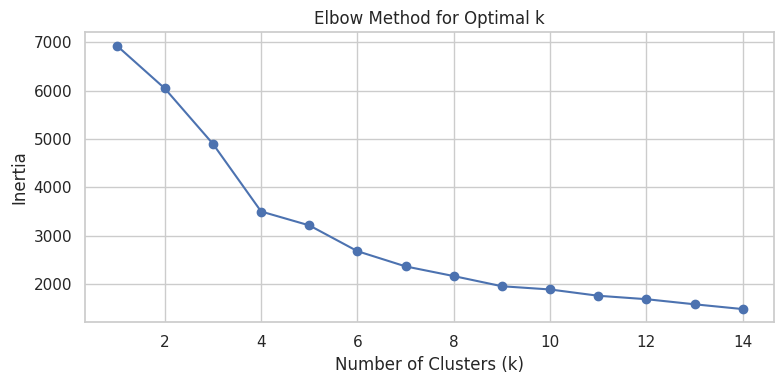

In [116]:
#Using the Elbow Method to find Best K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 15)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [117]:
#Applying the k-Means with chosen k=4
# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original dataset
df_model['cluster'] = clusters


In [118]:
# Analyze the Cluster Characteristics
# Get average values per cluster
cluster_summary = df_model.groupby('cluster')[features].mean().round(2)
print(cluster_summary)


         Duration   MILES  Start_Hour  WEEKDAY  PURPOSE  CATEGORY
cluster                                                          
0           18.86    7.60       16.43     3.06     5.24      0.00
1           22.08    8.63       13.38     2.73     8.58      0.00
2           18.29    7.07       14.63     2.79     8.86      1.00
3          168.95  142.93       15.86     2.19     6.86      0.05


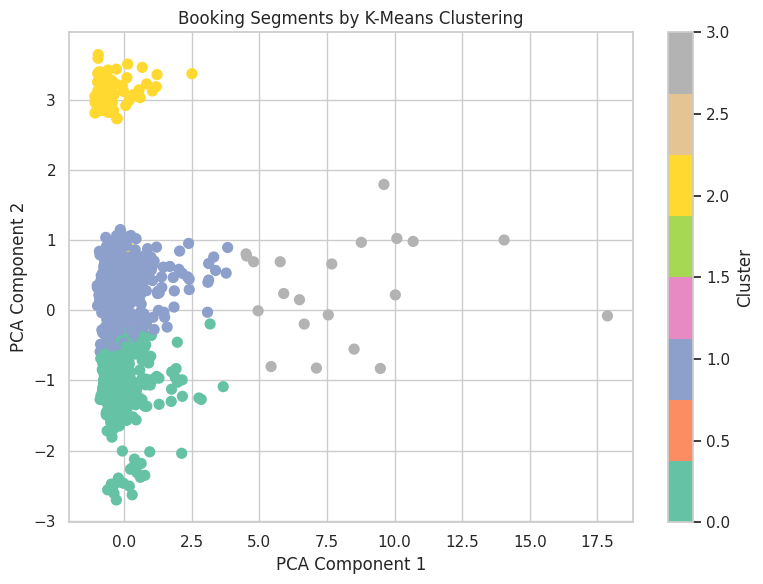

In [119]:
# Visualize Clusters (with PCA)

from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='Set2', s=50)
plt.title('Booking Segments by K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


In [120]:
# Creating the Model
# Example: Adding cluster as feature for a regression model predicting Duration or MILES

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prepare features & target
X = df_model[features + ['cluster']]
y = df_model['Duration']  # or 'MILES' or other target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 0.4904498269896194


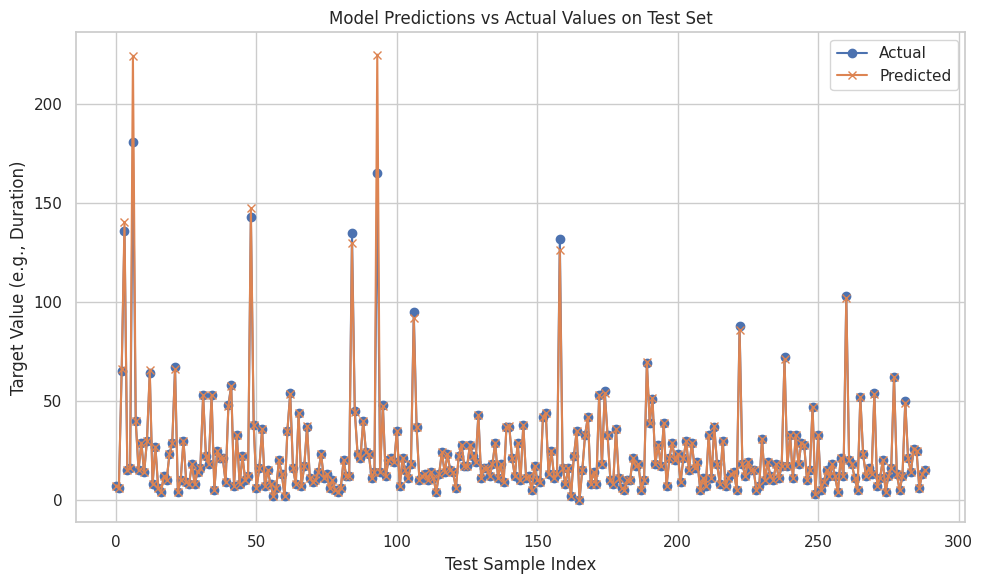

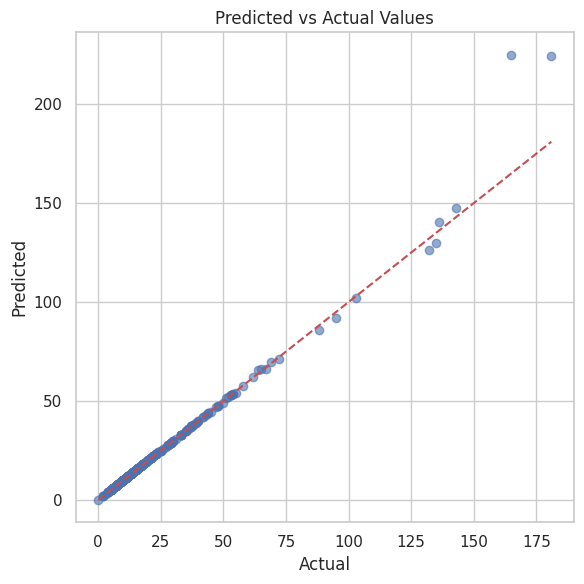

In [122]:
#Visualizing the Predictions vs Actuals on Test data
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', marker='o')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', marker='x')

plt.title("Model Predictions vs Actual Values on Test Set")
plt.xlabel("Test Sample Index")
plt.ylabel("Target Value (e.g., Duration)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Scatter Plot to get another visuals
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.grid(True)
plt.tight_layout()
plt.show()


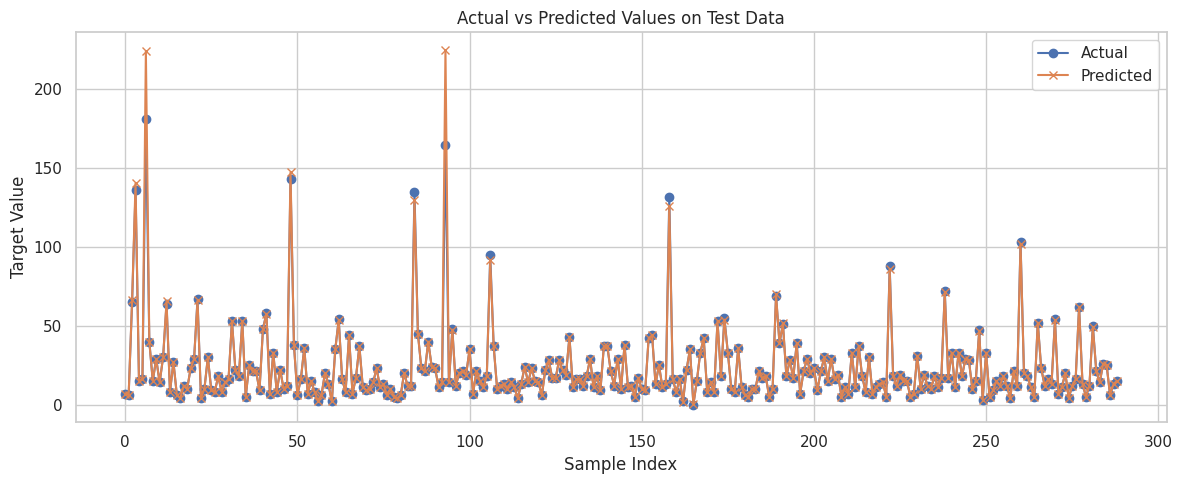

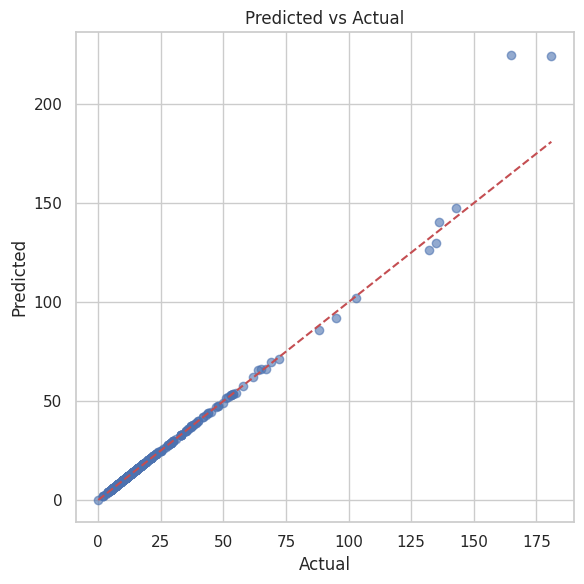

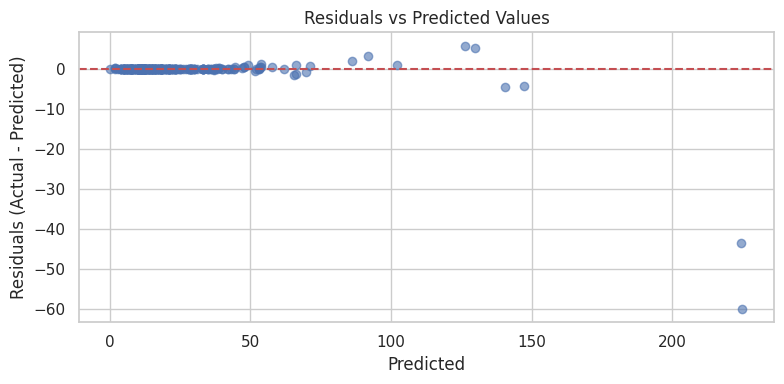

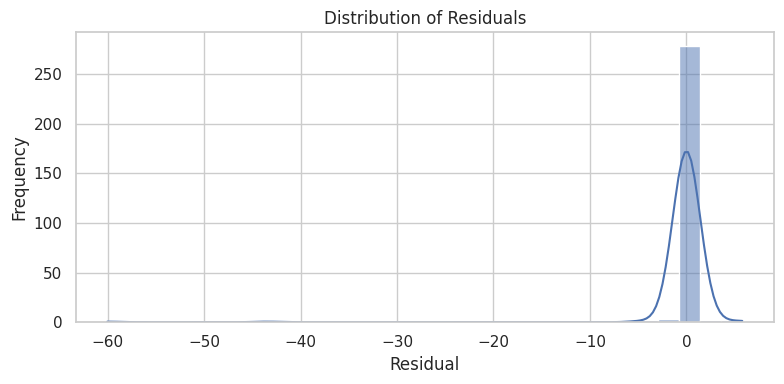

Cluster-wise Residual Statistics:
           mean     std  count
Cluster                       
0         0.085   0.563    113
1         0.043   0.533    151
2         0.146   0.478     21
3       -28.090  28.156      4


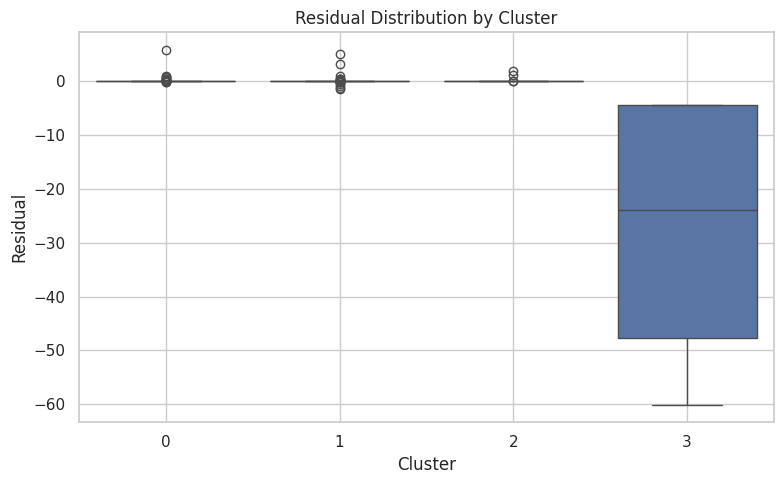

In [124]:
# Different Visualizations to evaluate the results

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Residuals
residuals = y_test - y_pred

# 1. Line plot: Actual vs Predicted
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', marker='o')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Values on Test Data")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Scatter plot: Predicted vs Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Residuals plot: Residuals vs Predicted
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Histogram of Residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 5. Cluster-wise error analysis
# Create a DataFrame for analysis
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals,
    'Cluster': df_model.loc[y_test.index, 'cluster']
})

cluster_errors = results_df.groupby('Cluster')['Residual'].agg(['mean', 'std', 'count']).round(3)
print("Cluster-wise Residual Statistics:")
print(cluster_errors)

# Optional: Boxplot of residuals by cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Residual', data=results_df)
plt.title("Residual Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()


In this project, we explored various machine learning approaches to analyze and model booking data across both supervised and unsupervised tasks. For classification, we predicted the category of each booking (business or personal) using models like Logistic Regression, Random Forest, and XGBoost. To predict trip distance, we employed regression models including Linear Regression and Random Forest Regressor. For forecasting daily booking volumes, we applied time series models such as ARIMA, Prophet, and LSTM, with Prophet performing best due to its ability to capture trends and seasonality effectively. Finally, we used K-Means clustering to segment bookings based on behavioral features like duration, time of day, and purpose, uncovering distinct usage patterns. Overall, the project successfully combined predictive and descriptive analytics to both anticipate future trends and understand user behavior, providing a comprehensive view of the booking ecosystem.